In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

# Fixed values for all plots

In [2]:
# # Loads algae names
# with open('../../fixed_values-pickles/pickle_files/algae_names.pkl', 'rb') as fp:
# 	algae_names = pickle.load(fp)

# # Loads content types (ashes, moisture, ...)
# with open('../../fixed_values-pickles/pickle_files/content_types.pkl', 'rb') as fp:
# 	content_types = pickle.load(fp)

# control_color = '#FFFFFF' # white
# xlabel = 'Burger type'
# ylabel = 'Percentage of '

# def get_contenttype(in_ct):
# 	content_type = content_types[in_ct]
# 	return content_type

# def set_filename(alga, ct):
# 	filename = alga + '_' + ct
# 	return filename

# First type

In [3]:
# ##### SAVEFIG

# def pieplot_first(filename, a, b, a_label, b_label, a_color, b_color):

# 	# Definizione dati
# 	values = [a, b]
# 	labels = [a_label, b_label]

# 	# Calcola la percentuale
# 	def make_autopct(values):
# 		def my_autopct(pct):
# 			total = sum(values)
# 			val = int(round(pct*total/100.0))
# 			return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
# 		return my_autopct

# 	# Crea il pieplot
# 	plt.pie(values, labels = labels, colors=[a_color, b_color], autopct=make_autopct(values))

# 	plt.savefig('pie_outs/'+filename+'.pdf', format="pdf")

In [4]:
# ##### PRINT

# def pieplot_first(data, a_label, b_label, a_color, b_color):


# 	# Definizione dati
# 	values = [a, b]
# 	labels = [a_label, b_label]

# 	# Calcola la percentuale
# 	def make_autopct(values):
# 		def my_autopct(pct):
# 			total = sum(values)
# 			val = int(round(pct*total/100.0))
# 			return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
# 		return my_autopct

# 	# Crea il pieplot
# 	plt.pie(values, labels = labels, colors=[a_color, b_color], autopct=make_autopct(values))

In [5]:
# # 
# filename = ''
# a = 7
# b = 21
# a_label = ''
# b_label = ''
# a_color = '#C8EFCE'  # white
# b_color = '#006100'  # light green

# pieplot(filename, a, b, a_label, b_label, a_color, b_color)

# Second type

## Functions for second type

In [6]:
def csv_to_dic(csv_file):

	# Given a series/column, makes a dic {answer : counts}
	def occurrences_dic(column):
		return column.value_counts().to_dict()

	# Load the CSV file into a DataFrame
	df = pd.read_csv(csv_file)

	# Counts the columns
	n_columns = len(df.columns)

	# Initialize the dictionary
	dic = {}

	# Iterates for every column of the csv
	for column in range(n_columns):

		# Selects only the current column
		sel_column = df.iloc[:, column]
		
		# If the csv is a "buy type" (the ones with more than one column)
		if n_columns != 1:

			# Get and format the header
			header = sel_column.name
			header = header[-3:-1] # Write [-2:-1] for only the letter

			# Makes dic {answer : counts}
			occurrences = occurrences_dic(sel_column)
			dic[header] = occurrences
		
		# If the csv is a "prefer type" (the ones with only one column)
		else:
			dic = occurrences_dic(sel_column)

	return dic

In [7]:
def pieplot_second(data, a_color, b_color, c_color):

	# Definizione dati
	labels = data.keys()
	values = data.values()

	# Calcola la percentuale
	def make_autopct(values):
		def my_autopct(pct):
			total = sum(values)
			val = int(round(pct*total/100.0))
			return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
		return my_autopct

	# Crea il pieplot
	plt.pie(values, labels = labels, colors=[a_color, b_color, c_color], autopct=make_autopct(values))

In [8]:
# def barplot_second(data, a_color, b_color, c_color):

## Diets (personal info)

In [9]:
a_color = '#801818' # 
b_color = '#004225' # 
c_color = '#AD2624' # 

{'Omnivore or other': 36, 'Vegetarian': 5}


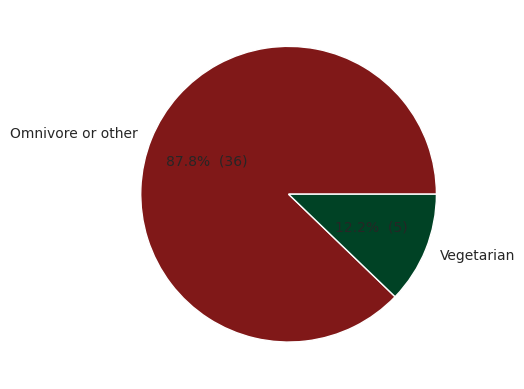

In [10]:
diet = csv_to_dic('data/second_type/diet.csv')

print(diet)

pieplot_second(diet, a_color, b_color, c_color)

## Burger samples (sensory analysis)

In [11]:
a_color = '#801818' # 
b_color = '#003250' # 
c_color = '#AD2624' # 
d_color = '#004225' # 
e_color = '#800020' # 

In [12]:
current = csv_to_dic('data/second_type/sample_2-buy.csv')

print(current)

{'2A': {'Probably would not buy': 12, 'Maybe would buy': 11, 'Probably would buy': 11, 'Certainly would not buy': 4, 'Certainly would buy': 3}, '2B': {'Probably would not buy': 16, 'Maybe would buy': 9, 'Probably would buy': 9, 'Certainly would buy': 4, 'Certainly would not buy': 2}, '2C': {'Maybe would buy': 15, 'Probably would buy': 9, 'Probably would not buy': 9, 'Certainly would buy': 4, 'Certainly would not buy': 2}}


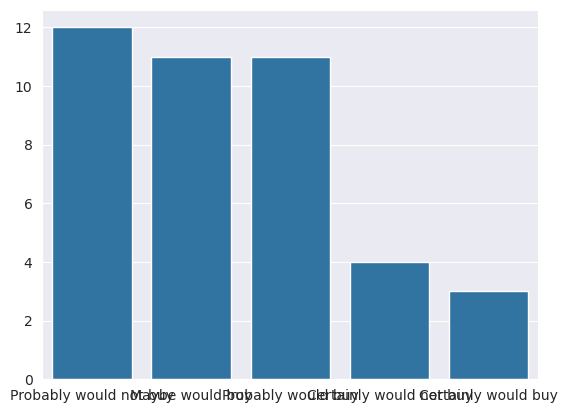

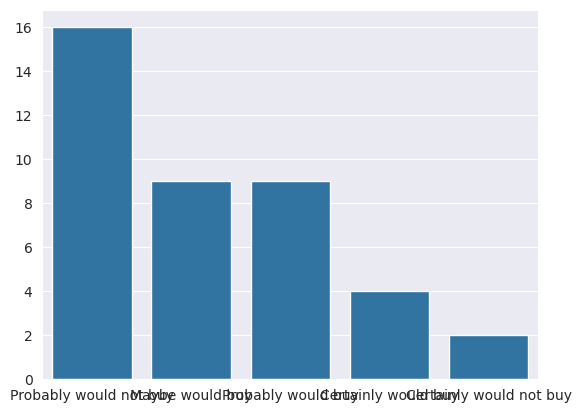

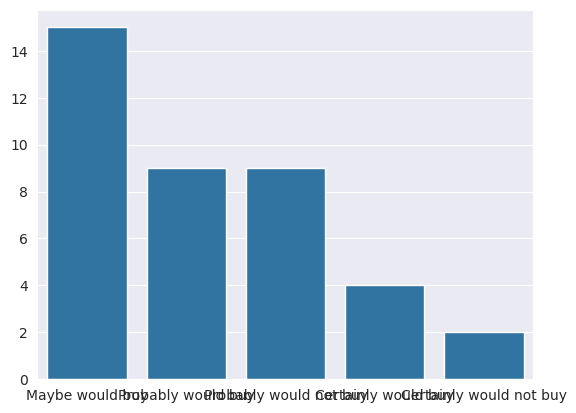

In [13]:
def barplot_second(data, a_color, b_color, c_color, d_color, e_color):

	for dic in data:
		# burger_type is like 1A, 1B, 2A, 2B, etc...
		burger_type = dic

		x = data[dic].keys()
		y = data[dic].values()
	
	
		barplot = sns.barplot(x=x, y=y, errorbar=None)
		# plt.savefig('outs/' + burger_type + '.pdf', format="pdf")
		plt.show()
		# plt.close

barplot_second(current, a_color, b_color, c_color, d_color, e_color)

### Sample 1

### Sample 2

### Sample 3